In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from scipy import stats
import math 
import statistics 
from scipy.integrate import quad
import seaborn as sns
from scipy.stats import chi2

In [3]:
x = np.array([5,8,6,12,14,18,11,6,13,7])
N = 100
x_arr = np.array([])
for i in range (0,10):
    for j in range (0, x[i]):
        x_arr = np.append([x_arr], i)
x_arr

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9.])

# A
## Функция распределения (ФР) иэмпирическая функция распределения (ЭФР)

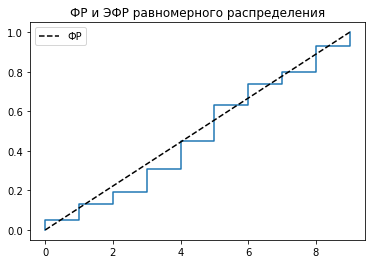

In [5]:
def plot_ecdf(values, xlim):
    X_ = sorted(set(values))
    Y_ = [np.mean(values < x) for x in X_]
    X = sum([[v, v] for v in X_], [])
    Y = sum([[v, v] for v in Y_], [])
    Y = Y[1:]+[1]
    plt.plot(X, Y)
    return Y

Y_ecdf = plot_ecdf(x_arr, [0, 9])

X = np.arange(0, 10)
Y = stats.uniform.cdf(X, loc = 0, scale = 9)
plt.plot(X, Y, '--', color='k', label='ФР')

plt.title('ФР и ЭФР равномерного распределения')
plt.legend()
plt.show()

## Дельта и p-value для Колмогорова

In [8]:
delta_ = max(abs(Y.repeat(2)-Y_ecdf))*100**0.5
delta_ 

1.4333333333333331

In [9]:
p_value = 0
for i in range(1,1000):
    p_value += -2*(-1**i)*np.exp(-2*i**2*delta_**2)
print(f"p_value = {p_value}")


p_value = 0.032852176636945195


# B
## Определение неизвестных параметров нормального распределения

In [22]:
limits = np.array(-np.inf)
limits = np.append(limits, np.arange(0.5, 9, 1))
limits = np.append(limits, np.inf)
def integrand(x, sigma, m):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-m)**2/(2*sigma**2))

def best_param(x):
    maxim = 0 
    sigma_ = 0
    m_ = 0
    for sigma in np.arange(2, 3, 0.1):
        for m in np.arange(3, 5, 0.1):
            L = 1 
            for i in range(0, len(limits)-1, ):
                L *= quad(integrand, limits[i], limits[i+1], args = (sigma, m))[0]**x[i]
            if (L > maxim):
                maxim, sigma_, m_ = L, sigma, m
    return sigma_, m_

def best_param_omm(x_arr):
    a1 = np.mean(x_arr)
    a2 = np.mean(x_arr**2) 
    m_ = a1
    sigma_ = (a2 - a1**2)**0.5
    return sigma_, m_
    
    

In [23]:
z1, z2 = best_param_omm(x_arr)
print(z1, z2)   

2.5054141374231933 4.77


In [12]:
sigma_, m_ = best_param(x)
print(sigma_, m_)       

2.7000000000000006 4.800000000000002


## Расчет вероятностей по определленным параметрам и дельты

In [14]:
probabilities = np.array([quad(integrand, limits[i], limits[i+1], args = (sigma_, m_))[0] for i in range(0, len(limits)-1)])
delta_b = 0
for i in range(len(x)):
    delta_b += (x[i]-N*probabilities[i])**2/(N*probabilities[i])
delta_b

9.779231990914937

## Колмогоров

In [25]:
arr_f = np.array([])
for i in range(0,10):
    arr_f =  np.append(arr_f, quad(integrand, -np.inf, i, args = (sigma_, m_))[0])
delta_b_kol = max(abs(arr_f.repeat(2) - Y_ecdf))*np.sqrt(N)
print(f"basic delta in Kolmogorov = {delta_b_kol}")


basic delta in Kolmogorov = 1.0047572223260304


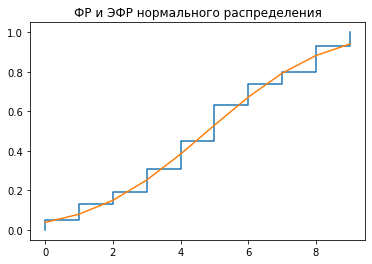

In [26]:
plot_ecdf(x_arr,[0,9])
plt.plot(np.arange(0,10), arr_f)
plt.title('ФР и ЭФР нормального распределения')
plt.show() 

In [40]:
%%time
delta_arr = np.array([])
for i in range(0, 50000):
    bootstrap = np.sort(np.random.normal(m_, sigma_, N).astype(int))
    sigma_i, m_i = best_param_omm(bootstrap)
    arr_f = np.array([])
    for j in range(0,10):
        arr_f =  np.append(arr_f, quad(integrand, -np.inf, j, args = (sigma_i, m_i))[0])
    delta_arr = np.append(delta_arr, max(abs(arr_f.repeat(2) - Y_ecdf))*np.sqrt(N))

Wall time: 6min 35s


In [47]:
delta_arr.sort()
k_ = sum(delta_arr < delta_b_kol)
k_ += 1

p_value_b_kol = 1 - (k_ - 1)/50000
print(f"p_value by Kolmogorov and parametric_bootstrap = {p_value_b_kol}")
print(" Нет оснований отвергнуть H0")

p_value by Kolmogorov and parametric_bootstrap = 0.95214
 Нет оснований отвергнуть H0


# C

In [41]:
sigma_c, m_c = best_param_omm(x_arr)
print(sigma_c, m_c) 

2.5054141374231933 4.77


In [44]:
probabilities_c = np.array([quad(integrand, limits[i], limits[i+1], args = (sigma_c, m_c))[0] for i in range(0, len(limits)-1)])
delta_c = 0
for i in range(len(x)):
    delta_c += (x[i] - probabilities_c[i]*100)**2/(100*probabilities_c[i])
delta_c
np.random.normal(m_c, sigma_c, N).astype(int)


array([ 5,  5,  6,  5,  2,  4,  4,  6,  5,  6,  6,  1,  6,  5,  6,  5,  7,
        5,  5,  4,  8,  2,  3,  3,  9,  6,  8,  2,  6,  0,  2,  1,  6,  8,
        0,  5,  7,  7,  6,  2,  2,  1,  3,  0,  3,  2,  1,  2, -2,  6,  8,
        3,  1,  4,  3,  9,  3,  2,  7,  9,  8,  8,  8,  3,  6,  3,  9,  7,
        7,  4,  6,  4,  5,  6,  9,  7,  9, 10,  5,  1,  8,  5,  6,  6,  6,
        4,  6,  4,  2,  5,  3,  5,  5,  4,  8,  8,  0,  2,  5,  7])

In [45]:
delta_arr_c = np.array([])

for i in range(0, 50000):
    
    bootstrap = np.sort(np.random.normal(m_c, sigma_c, N).astype(int))
    count = np.array([])
    for j in [0,1,2,3,4,5,6,7,8,9]: # there may not be a number in bootstrap
        count = np.append(count, sum(bootstrap == j)) 
        
    delta_i = 0
    m_i = np.mean(bootstrap)
    sigma_i = (np.mean(bootstrap**2) - m_i**2)**0.5
    
    probabilities_i = np.array([quad(integrand, limits[k], limits[k+1], args = (sigma_i, m_i))[0] for k in range(0, len(limits)-1)])
    for j in range(0,10):
        delta_i +=  (count[j] - probabilities_i[j]*100)**2/(100*probabilities_i[j])
    delta_arr_c = np.append(delta_arr_c, delta_i)


In [60]:
delta_arr_c.sort()
k_c = sum(delta_arr_c < delta_c)
k_c += 1

p_value_c = 1 - (k_c - 1)/50000
print(f"p_value = {p_value_c}")
print(" нет оснований отвергнуть H0")

p_value = 0.21062000000000003
 нет оснований отвергнуть H0


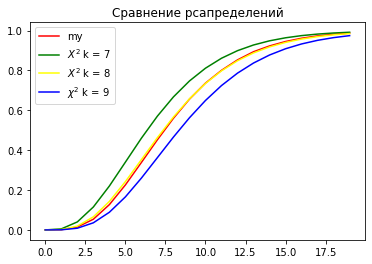

In [59]:
def integrand_Xi(x, k):
    return (x**(k/2-1))*np.exp(-x/2)/(2**(k/2)*math.gamma(k/2))
arr_f_с = np.array([])
arr_f_x9 = np.array([])
arr_f_x8 = np.array([])
arr_f_x7 = np.array([])
for i in range(0,20):
    #arr_f_с =  np.append(arr_f_с, quad(integrand, -np.inf, i, args = (sigma_c, m_c))[0])
    arr_f_с =  np.append(arr_f_с, sum(delta_arr_c < i)/50000)
    arr_f_x7 =  np.append(arr_f_x7, quad(integrand_Xi, 0, i, args = 7)[0])
    arr_f_x8 =  np.append(arr_f_x8, quad(integrand_Xi, 0, i, args = 8)[0])
    arr_f_x9 =  np.append(arr_f_x9, quad(integrand_Xi, 0, i, args = 9)[0])
plt.plot(np.arange(0,20), arr_f_с, label="my", color = 'red')
plt.plot(np.arange(0,20), arr_f_x7, label = "$X^2$ k = 7", color = 'green')
plt.plot(np.arange(0,20), arr_f_x8, label = "$X^2$ k = 8", color = 'yellow')
plt.plot(np.arange(0,20), arr_f_x9, label = "$\chi^2$ k = 9", color = "blue")
plt.title("Сравнение рсапределений")
plt.legend()
plt.show()